In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
base1 = pd.read_csv("base_111_tratada_v2.csv", encoding="latin-1")

In [3]:
base2 = pd.read_csv("base_222.csv", encoding="latin-1")

Afim de limpar a base sem instrumentos estatísticos, iremos considerar a base tratada v2 (sem valores absurdo e sem inconsistências nas variáveis principais)

In [4]:
# O teste básico nessa etapa será a checagem de perda de informações ao longo de um dia todo, por isso utilizaremos uma função de checagem

def checa_dia(base, dia, ano):
    anos = base[ano].unique()
    anos.sort()
    
    for i in anos:
        base_aux = base[base[ano] == i]
        print(f"No ano {i} a base tem {base_aux[dia].nunique()} dias\n")

In [5]:
checa_dia(base2,'Dia Juliano','Ano')

No ano 1997 a base tem 365 dias

No ano 1998 a base tem 315 dias

No ano 1999 a base tem 365 dias

No ano 2000 a base tem 360 dias

No ano 2001 a base tem 340 dias

No ano 2002 a base tem 362 dias

No ano 2003 a base tem 365 dias

No ano 2004 a base tem 365 dias

No ano 2006 a base tem 355 dias

No ano 2007 a base tem 357 dias

No ano 2008 a base tem 365 dias

No ano 2009 a base tem 364 dias

No ano 2010 a base tem 364 dias

No ano 2011 a base tem 365 dias

No ano 2012 a base tem 366 dias

No ano 2013 a base tem 363 dias

No ano 2014 a base tem 364 dias

No ano 2015 a base tem 359 dias

No ano 2016 a base tem 366 dias



In [6]:
checa_dia(base1,'Dia Juliano','Ano')

No ano 1997.0 a base tem 365 dias

No ano 1998.0 a base tem 316 dias

No ano 1999.0 a base tem 365 dias

No ano 2000.0 a base tem 362 dias

No ano 2001.0 a base tem 341 dias

No ano 2002.0 a base tem 364 dias

No ano 2003.0 a base tem 365 dias

No ano 2004.0 a base tem 366 dias

No ano 2005.0 a base tem 365 dias

No ano 2006.0 a base tem 356 dias

No ano 2007.0 a base tem 358 dias

No ano 2008.0 a base tem 366 dias

No ano 2009.0 a base tem 365 dias

No ano 2010.0 a base tem 365 dias

No ano 2011.0 a base tem 365 dias

No ano 2012.0 a base tem 366 dias

No ano 2013.0 a base tem 364 dias

No ano 2014.0 a base tem 365 dias

No ano 2015.0 a base tem 361 dias

No ano 2016.0 a base tem 366 dias

No ano 2017.0 a base tem 1 dias



# Ideia do tratamento

A ideia aqui é utilizar os valores coletados na base 222 para tratar a base 111, foi notado que mesmo a base 222 consta com alguns valores inconsistentes, mas deixaremos o tratamento final na base limpa pelo benchmark

# 1 - Variáveis similares nas bases

In [7]:
base1.columns

Index(['Unnamed: 0', 'Cod', 'Ano', 'Dia Juliano', 'Hora - minuto',
       'Veloc. Instantânea do Vento a 5 metros (m/s)',
       'Veloc. Instantânea do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da aquisição (°)',
       'Radiação Incidente total de 10 leituras (KW/m2)',
       'Radiação Refletida Total de 10 leituras (KW/m2)',
       'Fluxo Positivo de calor no solo total de 10 leituras (W/m2)',
       'Fluxo negativo de calor no solo . total de 10 leituras (W/m2)',
       'Umidade relativa Média (%)', 'Temperatura do Ar Média (°C)',
       'Temperatura do solo  1 Média (°C) à 3cm no solo',
       'Temperatura do solo 2Média (°C) à 6cm no solo ',
       'Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09',
       'Pressão (hPa)', 'Chuva total do período (mm)'],
      dtype='object')

In [8]:
base2.columns

Index(['Cod', 'Ano', 'Dia Juliano', 'Hora - minuto',
       'Veloc. máxima do Vento a 5 metros (m/s)',
       'Veloc. máxima do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da veloc. Máx.(°)',
       'Horário de ocorrência vr máx. veloc. do vento',
       'Radiação Incidente Total do dia (KW/m2)',
       'Radiação Refletida Total do dia (KW/m2)',
       'Fluxo positivo de calor no solo Total do dia (KW/m2)',
       'Fluxo Negativo de calor no solo. Total do dia (KW/m2)',
       'Temperatura do Ar  Máxima do dia (°C)',
       'Horário de ocorrência da Temp. Ar Máxima(°C)',
       'Temperatura do Ar Mínima do dia (°C)',
       'Horário de ocorrência da Temp. Ar Minima',
       'Temperatura do Solo 1 Máxima do dia (°C)',
       'Horário de ocorrência da Temp. Solo 1 Máxima.',
       'Temperatura do Solo 1 Mínima do dia (°C)',
       'Horário de ocorrência da Temp. Solo 1 minima',
       'Chuva total do dia (mm)'],
      dtype='object')

In [9]:
# Definindo as variáveis de parâmetro

max_ar_temp = 'Temperatura do Ar  Máxima do dia (°C)'
min_ar_temp = 'Temperatura do Ar Mínima do dia (°C)'
chuva_total = 'Chuva total do dia (mm)'
radiacao_inc = 'Radiação Incidente Total do dia (KW/m2)'
radiacao_ref = 'Radiação Refletida Total do dia (KW/m2)'
vel_max_5 = 'Veloc. máxima do Vento a 5 metros (m/s)'
vel_max_2 = 'Veloc. máxima do Vento a 2 metros (m/s)'
dir_vel_max = 'Direção do Vento no instante da veloc. Máx.(°)'

# Checando se os dados das duas bases se conversam

In [10]:
base2.head()

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
0,222,1997,1,2400,6031.00,2677.0,99.60,1923,270.8,53.81,...,-34.76,30.16,1255,18.50,551.0,34.53,1258,19.15,606.0,0.0
1,222,1997,2,2400,4756.00,1758.0,119.50,45,165.3,27.46,...,-26.86,26.15,1417,19.15,2355.0,27.66,1425,19.65,2352.0,0.0
2,222,1997,3,2400,5227.00,2631.0,3412.00,337,231.5,44.02,...,-27.57,25.74,1208,17.84,2333.0,34.49,1214,18.10,551.0,0.0
3,222,1997,4,2400,3.58,2095.0,5864.00,2053,263.7,53.38,...,-20.56,29.69,1625,17.81,126.0,37.73,1630,19.25,329.0,0.0
4,222,1997,5,2400,5.58,2509.0,13.03,1755,328.7,70.90,...,-23.58,31.36,1543,17.95,535.0,46.95,1321,20.55,601.0,0.0


In [11]:
base1[(base1['Ano'] == 1997) & (base1['Dia Juliano'] == 1) & (base1['Hora - minuto'] == 1920)]

,Unnamed: 0,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),Fluxo Positivo de calor no solo total de 10 leituras (W/m2),Fluxo negativo de calor no solo . total de 10 leituras (W/m2),Umidade relativa Média (%),Temperatura do Ar Média (°C),Temperatura do solo 1 Média (°C) à 3cm no solo,Temperatura do solo 2Média (°C) à 6cm no solo,Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09,Pressão (hPa),Chuva total do período (mm)
98,115,111.0,1997.0,1.0,1920.0,3835.0,2616.0,73.8,0.0,0.0,0.0,-500.0,75.5,22.29,23.69,25.67,27.18,942.0,0.0


In [12]:
# É possível notar que os horários da base diária não conversam com a base 10min, logo será utilizada somente como benchmark e não como comparativo

# Ajuste fino na base 2

In [13]:
for v in base2.columns:
    base2[v] = pd.to_numeric(base2[v], errors='coerce')

In [14]:
base2.shape

(6914, 21)

In [15]:
base2 = base2.dropna()

In [16]:
base2.shape

(6762, 21)

In [38]:
checa_dia(base2,'Dia Juliano','Ano')

No ano 1997 a base tem 365 dias

No ano 1998 a base tem 315 dias

No ano 1999 a base tem 365 dias

No ano 2000 a base tem 360 dias

No ano 2001 a base tem 340 dias

No ano 2002 a base tem 362 dias

No ano 2003 a base tem 365 dias

No ano 2004 a base tem 364 dias

No ano 2006 a base tem 355 dias

No ano 2007 a base tem 357 dias

No ano 2008 a base tem 365 dias

No ano 2009 a base tem 364 dias

No ano 2010 a base tem 364 dias

No ano 2011 a base tem 365 dias

No ano 2012 a base tem 366 dias

No ano 2013 a base tem 363 dias

No ano 2014 a base tem 364 dias

No ano 2015 a base tem 358 dias

No ano 2016 a base tem 216 dias



# Tratando os dados com intervalos da base 2

In [17]:
base1.shape

(1013879, 19)

In [18]:
base_merged = base1.merge(base2, how='left', on=['Ano','Dia Juliano'])

In [19]:
base_merged.shape

(1040496, 38)

In [20]:
base_merged.head()

,Unnamed: 0,Cod_x,Ano,Dia Juliano,Hora - minuto_x,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
0,0,111.0,1997,1,10.0,1618.00,1115.000,8.32,0.0,0.0,...,-34.76,30.16,1255.0,18.5,551.0,34.53,1258.0,19.15,606.0,0.0
1,1,111.0,1997,1,20.0,0.99,0.763,20.59,0.0,0.0,...,-34.76,30.16,1255.0,18.5,551.0,34.53,1258.0,19.15,606.0,0.0
2,2,111.0,1997,1,30.0,2.05,1115.000,17.72,0.0,0.0,...,-34.76,30.16,1255.0,18.5,551.0,34.53,1258.0,19.15,606.0,0.0
3,3,111.0,1997,1,40.0,3089.00,1422.000,189.20,0.0,0.0,...,-34.76,30.16,1255.0,18.5,551.0,34.53,1258.0,19.15,606.0,0.0
4,4,111.0,1997,1,50.0,2128.00,1406.000,153.20,0.0,0.0,...,-34.76,30.16,1255.0,18.5,551.0,34.53,1258.0,19.15,606.0,0.0


In [21]:
base1.columns

Index(['Unnamed: 0', 'Cod', 'Ano', 'Dia Juliano', 'Hora - minuto',
       'Veloc. Instantânea do Vento a 5 metros (m/s)',
       'Veloc. Instantânea do Vento a 2 metros (m/s)',
       'Direção do Vento no instante da aquisição (°)',
       'Radiação Incidente total de 10 leituras (KW/m2)',
       'Radiação Refletida Total de 10 leituras (KW/m2)',
       'Fluxo Positivo de calor no solo total de 10 leituras (W/m2)',
       'Fluxo negativo de calor no solo . total de 10 leituras (W/m2)',
       'Umidade relativa Média (%)', 'Temperatura do Ar Média (°C)',
       'Temperatura do solo  1 Média (°C) à 3cm no solo',
       'Temperatura do solo 2Média (°C) à 6cm no solo ',
       'Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09',
       'Pressão (hPa)', 'Chuva total do período (mm)'],
      dtype='object')

In [22]:
for v in base_merged.columns:
    base_merged[v] = pd.to_numeric(base_merged[v], errors='coerce')

In [23]:
#Criando variáveis auxiliares de filtro

base_merged['flag_temp_max'] = base_merged[max_ar_temp] >= base_merged['Temperatura do Ar Média (°C)']
base_merged['flag_temp_min'] = base_merged[min_ar_temp] <= base_merged['Temperatura do Ar Média (°C)']
base_merged['flag_chuva'] = base_merged[chuva_total] >= base_merged['Chuva total do período (mm)']
base_merged['flag_dir_vento'] = base_merged[dir_vel_max] >= base_merged['Direção do Vento no instante da aquisição (°)']
base_merged['flag_rad_inc'] = base_merged[radiacao_inc] >= base_merged['Radiação Incidente total de 10 leituras (KW/m2)']
base_merged['flag_rad_ref']= base_merged[radiacao_ref] >= base_merged['Radiação Refletida Total de 10 leituras (KW/m2)']

In [24]:
def interval(base,var):
    print(f"Min da variavel {var} : {base[var].min()}")
    print(f"\nMax da variavel {var} : {base[var].max()}")

In [25]:
interval(base2,max_ar_temp)

Min da variavel Temperatura do Ar  Máxima do dia (°C) : 11.66

Max da variavel Temperatura do Ar  Máxima do dia (°C) : 6999.0


In [26]:
interval(base2,min_ar_temp)

Min da variavel Temperatura do Ar Mínima do dia (°C) : 0.0

Max da variavel Temperatura do Ar Mínima do dia (°C) : 6991.0


In [27]:
interval(base2,chuva_total)

Min da variavel Chuva total do dia (mm) : 0.0

Max da variavel Chuva total do dia (mm) : 6858.0


In [28]:
interval(base2,dir_vel_max)

Min da variavel Direção do Vento no instante da veloc. Máx.(°) : 0.0

Max da variavel Direção do Vento no instante da veloc. Máx.(°) : 6897.0


In [29]:
interval(base2,radiacao_inc)

Min da variavel Radiação Incidente Total do dia (KW/m2) : 0.0

Max da variavel Radiação Incidente Total do dia (KW/m2) : 6589.0


In [30]:
interval(base2,radiacao_ref)

Min da variavel Radiação Refletida Total do dia (KW/m2) : 0.0

Max da variavel Radiação Refletida Total do dia (KW/m2) : 6909.0


In [31]:
interval(base1,'Direção do Vento no instante da aquisição (°)')

Min da variavel Direção do Vento no instante da aquisição (°) : 0.0

Max da variavel Direção do Vento no instante da aquisição (°) : 360.0


In [90]:
c1 = base_merged.flag_temp_max == True
c2 = base_merged.flag_temp_min == True
c3 = base_merged.flag_chuva == True
c4 = base_merged.flag_dir_vento == True
c5 = base_merged.flag_rad_inc == True
c6 = base_merged.flag_rad_ref == True


base_test = base_merged[(c5) & (c6)]

# base_test = base_merged[(c3)]

In [91]:
base_test.head()

,Unnamed: 0,Cod_x,Ano,Dia Juliano,Hora - minuto_x,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),...,Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm),flag_temp_max,flag_temp_min,flag_chuva,flag_dir_vento,flag_rad_inc,flag_rad_ref
0,0,111.0,1997.0,1.0,10.0,1618.00,1115.000,8.32,0.0,0.0,...,1258.0,19.15,606.0,0.0,True,True,True,True,True,True
1,1,111.0,1997.0,1.0,20.0,0.99,0.763,20.59,0.0,0.0,...,1258.0,19.15,606.0,0.0,True,True,True,True,True,True
2,2,111.0,1997.0,1.0,30.0,2.05,1115.000,17.72,0.0,0.0,...,1258.0,19.15,606.0,0.0,True,True,True,True,True,True
3,3,111.0,1997.0,1.0,40.0,3089.00,1422.000,189.20,0.0,0.0,...,1258.0,19.15,606.0,0.0,True,True,True,False,True,True
4,4,111.0,1997.0,1.0,50.0,2128.00,1406.000,153.20,0.0,0.0,...,1258.0,19.15,606.0,0.0,True,True,True,False,True,True


In [92]:
checa_dia(base_test,'Dia Juliano','Ano')

No ano 1997.0 a base tem 365 dias

No ano 1998.0 a base tem 315 dias

No ano 1999.0 a base tem 365 dias

No ano 2000.0 a base tem 360 dias

No ano 2001.0 a base tem 340 dias

No ano 2002.0 a base tem 362 dias

No ano 2003.0 a base tem 365 dias

No ano 2004.0 a base tem 364 dias

No ano 2006.0 a base tem 355 dias

No ano 2007.0 a base tem 357 dias

No ano 2008.0 a base tem 365 dias

No ano 2009.0 a base tem 364 dias

No ano 2010.0 a base tem 364 dias

No ano 2011.0 a base tem 365 dias

No ano 2012.0 a base tem 331 dias

No ano 2013.0 a base tem 363 dias

No ano 2014.0 a base tem 364 dias

No ano 2015.0 a base tem 358 dias

No ano 2016.0 a base tem 216 dias



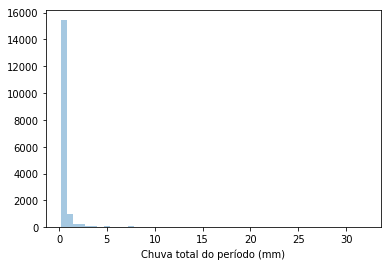

In [93]:
var = 'Chuva total do período (mm)'

sns.distplot(base_test[(base_test[var]<1000) & (base_test[var]>0)][var].dropna(),kde = False)

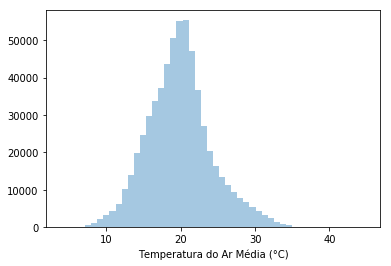

In [94]:
sns.distplot(base_test['Temperatura do Ar Média (°C)'], kde=False)

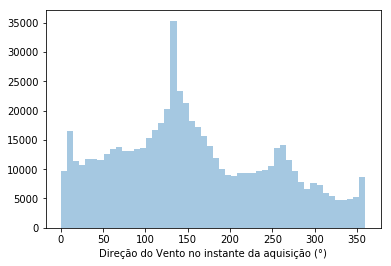

In [95]:
sns.distplot(base_test['Direção do Vento no instante da aquisição (°)'], kde=False)

# Categorizando a direção do vento

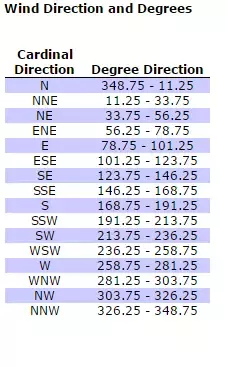

In [103]:
def dir_ar(x):
    if((x>=348.75) | (x < 11.25)):
        return 'N'
    elif((x>=11.25) & (x < 33.75)):
        return 'NNE'
    elif((x>=33.75) & (x < 56.25)):
        return 'NE'
    elif((x>=56.25) & (x < 78.75)):
        return 'ENE'
    elif((x>=78.75) & (x < 101.25)):
        return 'E'
    elif((x>=101.25) & (x < 123.75)):
        return 'ESE'
    elif((x>=123.75) & (x < 146.25)):
        return 'SE'
    elif((x>=146.25) & (x < 168.75)):
        return 'SSE'
    elif((x>=168.75) & (x < 191.25)):
        return 'S'
    elif((x>=191.25) & (x < 213.75)):
        return 'SSW'
    elif((x>=213.75) & (x < 236.25)):
        return 'SW'
    elif((x>=236.25) & (x < 258.75)):
        return 'WSW'
    elif((x>=258.75) & (x < 281.25)):
        return 'W'
    elif((x>=281.25) & (x < 303.75)):
        return 'WNW'
    elif((x>=303.75) & (x < 326.25)):
        return 'NW'
    elif((x>=326.25) & (x < 348.75)):
        return 'NNW'

In [104]:
base_test['Direcao_vento'] = base_test['Direção do Vento no instante da aquisição (°)'].map(dir_ar)

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
base_test['Direcao_vento'].head()

0      N
1    NNE
2    NNE
3      S
4    SSE
Name: Direcao_vento, dtype: object

In [106]:
base_test['Direcao_vento'].unique()

array(['N', 'NNE', 'S', 'SSE', 'ESE', 'SE', 'E', 'NE', 'ENE', 'SSW', 'WNW',
       'NW', 'W', 'NNW', 'WSW', 'SW'], dtype=object)

In [107]:
base_test[base_test['Direcao_vento'].isnull()]['Direção do Vento no instante da aquisição (°)']

Series([], Name: Direção do Vento no instante da aquisição (°), dtype: float64)

In [117]:
base_test.head()

,Unnamed: 0,Cod_x,Ano,Dia Juliano,Hora - minuto_x,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),...,Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm),flag_temp_max,flag_temp_min,flag_chuva,flag_dir_vento,flag_rad_inc,flag_rad_ref,Direcao_vento,Direcao_vento_num
0,0,111.0,1997.0,1.0,10.0,1618.00,1115.000,8.32,0.0,0.0,...,606.0,0.0,True,True,True,True,True,True,N,3
1,1,111.0,1997.0,1.0,20.0,0.99,0.763,20.59,0.0,0.0,...,606.0,0.0,True,True,True,True,True,True,NNE,5
2,2,111.0,1997.0,1.0,30.0,2.05,1115.000,17.72,0.0,0.0,...,606.0,0.0,True,True,True,True,True,True,NNE,5
3,3,111.0,1997.0,1.0,40.0,3089.00,1422.000,189.20,0.0,0.0,...,606.0,0.0,True,True,True,False,True,True,S,8
4,4,111.0,1997.0,1.0,50.0,2128.00,1406.000,153.20,0.0,0.0,...,606.0,0.0,True,True,True,False,True,True,SSE,10


c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


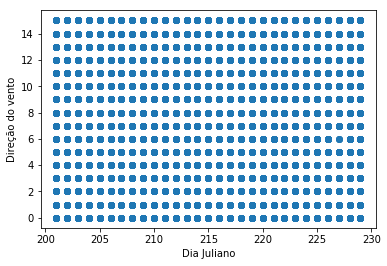

In [125]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(base_test['Direcao_vento'].unique())

vet_aux = le.transform(base_test['Direcao_vento'])

base_test['Direcao_vento_num'] = vet_aux


dia_min = 200
dia_max = 230
plt.scatter(base_test[(base_test['Dia Juliano'] > dia_min) & (base_test['Dia Juliano'] < dia_max)]['Dia Juliano'],base_test[(base_test['Dia Juliano'] > dia_min) & (base_test['Dia Juliano'] < dia_max)]['Direcao_vento_num'], alpha= 0.5)


plt.ylabel('Direção do vento')
plt.xlabel('Dia Juliano')

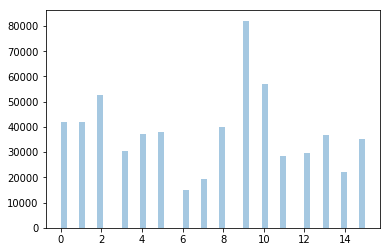

In [113]:
sns.distplot(vet_aux, kde= False)

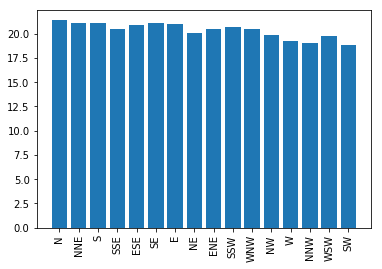

In [136]:
aux = base_test[base_test.Ano == 2015].groupby(['Direcao_vento']).agg({'Temperatura do Ar Média (°C)': np.mean, 'Chuva total do período (mm)': np.sum}).reset_index()
plt.bar(np.arange(len(aux['Temperatura do Ar Média (°C)'])),aux['Temperatura do Ar Média (°C)'])
plt.xticks(np.arange(len(base_test['Direcao_vento'].unique())), base_test['Direcao_vento'].unique(), rotation = 90)
plt.show()

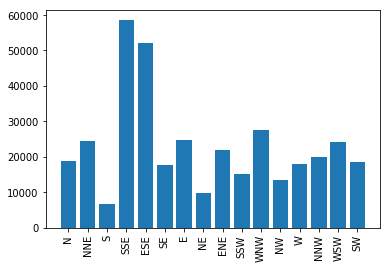

In [133]:
plt.bar(np.arange(len(aux['Chuva total do período (mm)'])),aux['Chuva total do período (mm)'])
plt.xticks(np.arange(len(base_test['Direcao_vento'].unique())), base_test['Direcao_vento'].unique(), rotation = 90)
plt.show()

# Analise de algumas consistências de dados da base2

### Max temperatura do Ar

In [40]:
base2[base2[max_ar_temp] > 100]

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
490,222,1998,176,2400,6738.0,2305.00,7.73,1042,186.00,31.57,...,-41.85,6999.0,1343.0,10.62,2135.0,6999.00,1343.0,12.41,2358.0,0.200
824,222,1999,139,2400,4345.0,2383.00,9.81,1432,55.73,9.94,...,-88.00,6999.0,1335.0,0.00,0.0,36.34,1407.0,0.00,0.0,0.000
1451,222,2000,363,2400,4815.0,3.05,382.70,1943,59.24,13.48,...,-6999.00,6999.0,2400.0,0.00,0.0,6999.00,2400.0,0.00,0.0,11.200
4104,222,2009,133,2400,2932.0,1912.00,349.20,1043,233.60,126.80,...,-21.99,6999.0,1129.0,16.57,643.0,26.40,1506.0,19.38,713.0,0.254


In [44]:
print(base1[(base1['Dia Juliano'] == 176) & (base1['Ano'] == 1998)]['Temperatura do Ar Média (°C)'].max())
print(base1[(base1['Dia Juliano'] == 139) & (base1['Ano'] == 1999)]['Temperatura do Ar Média (°C)'].max())
print(base1[(base1['Dia Juliano'] == 363) & (base1['Ano'] == 2000)]['Temperatura do Ar Média (°C)'].max())
print(base1[(base1['Dia Juliano'] == 133) & (base1['Ano'] == 2009)]['Temperatura do Ar Média (°C)'].max())

17.86
25.65
44.45
43.97


In [47]:
correction = [17.86, 25.65, 44.45, 43.97]


base2.loc[base2[max_ar_temp] > 100, max_ar_temp] = correction

In [48]:
base2[base2[max_ar_temp] > 100]

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)


### Mínima temperatura do ar

In [50]:
base2[base2[min_ar_temp] < 0]

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)


### Direção do vento

In [52]:
base2[base2[dir_vel_max] > 360]

,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. máxima do Vento a 5 metros (m/s),Veloc. máxima do Vento a 2 metros (m/s),Direção do Vento no instante da veloc. Máx.(°),Horário de ocorrência vr máx. veloc. do vento,Radiação Incidente Total do dia (KW/m2),Radiação Refletida Total do dia (KW/m2),...,Fluxo Negativo de calor no solo. Total do dia (KW/m2),Temperatura do Ar Máxima do dia (°C),Horário de ocorrência da Temp. Ar Máxima(°C),Temperatura do Ar Mínima do dia (°C),Horário de ocorrência da Temp. Ar Minima,Temperatura do Solo 1 Máxima do dia (°C),Horário de ocorrência da Temp. Solo 1 Máxima.,Temperatura do Solo 1 Mínima do dia (°C),Horário de ocorrência da Temp. Solo 1 minima,Chuva total do dia (mm)
2,222,1997,3,2400,5227.00,2631.00,3412.0,337,231.500,44.02,...,-27.57,25.74,1208.0,17.84,2333.0,34.49,1214.0,18.10,551.0,0.000
3,222,1997,4,2400,3.58,2095.00,5864.0,2053,263.700,53.38,...,-20.56,29.69,1625.0,17.81,126.0,37.73,1630.0,19.25,329.0,0.000
11,222,1997,12,2400,4168.00,1667.00,5445.0,1729,236.400,47.20,...,-22.90,29.15,1443.0,19.82,48.0,34.64,1458.0,22.43,602.0,8.000
16,222,1997,17,2400,5953.00,2509.00,6699.0,1633,280.600,57.20,...,-27.43,29.45,1244.0,18.21,2324.0,35.00,1253.0,20.62,2400.0,0.000
21,222,1997,22,2400,5208.00,2294.00,1556.0,1139,216.500,43.89,...,-22.36,29.18,1258.0,18.84,2331.0,32.60,1303.0,22.35,2356.0,3.200
38,222,1997,39,2400,6483.00,2447.00,2272.0,1613,311.600,67.39,...,-58.08,32.84,1357.0,18.82,1703.0,49.06,1402.0,22.56,2355.0,41.600
45,222,1997,46,2400,4129.00,1927.00,6639.0,1553,202.300,40.79,...,-34.50,30.18,1425.0,18.88,515.0,33.39,1551.0,21.84,614.0,11.200
46,222,1997,47,2400,4619.00,3.32,1795.0,1707,192.300,38.39,...,-32.23,28.39,1436.0,17.80,2318.0,32.34,1441.0,20.31,2052.0,64.800
53,222,1997,54,2400,5011.00,2264.00,4788.0,2037,247.200,58.66,...,-36.48,32.95,1346.0,19.26,602.0,45.59,1411.0,22.97,611.0,12.800
55,222,1997,56,2400,4031.00,1559.00,3529.0,1653,237.900,55.61,...,-29.36,30.72,1219.0,19.08,617.0,40.15,1321.0,21.31,617.0,0.000


In [60]:
# Talvez a melhor forma seja criando novas colunas de velocidades máximas e direções correspondentes , já com as correções

In [61]:
# Checando porque a radiação é inconsistente na base de 10 min

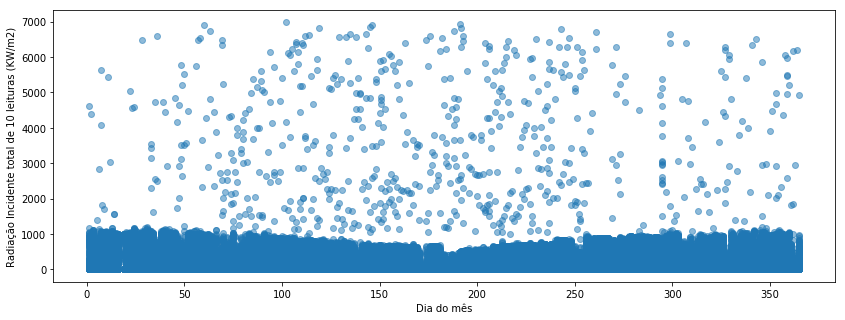

In [62]:
year = 2015

fig = plt.figure(figsize=(14, 5))
plt.scatter(base1[(base1.Ano == year)]['Dia Juliano'],base1[(base1.Ano == year)]['Radiação Incidente total de 10 leituras (KW/m2)'], alpha= 0.5)


plt.ylabel('Radiação Incidente total de 10 leituras (KW/m2)')
plt.xlabel('Dia do mês')

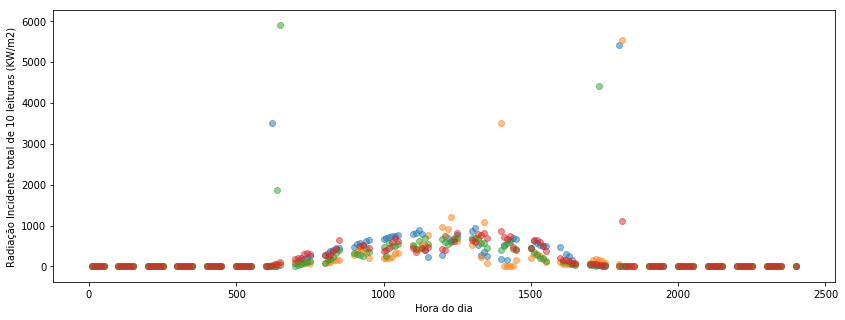

In [75]:
year = 2015
dia = 100

fig = plt.figure(figsize=(14, 5))
plt.scatter(base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Hora - minuto'],base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Radiação Incidente total de 10 leituras (KW/m2)'], alpha= 0.5)

year = 2015
dia = 50
plt.scatter(base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Hora - minuto'],base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Radiação Incidente total de 10 leituras (KW/m2)'], alpha= 0.5)

year = 2015
dia = 150
plt.scatter(base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Hora - minuto'],base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Radiação Incidente total de 10 leituras (KW/m2)'], alpha= 0.5)

year = 2015
dia = 300
plt.scatter(base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Hora - minuto'],base1[(base1.Ano == year)&(base1['Dia Juliano'] == dia)]['Radiação Incidente total de 10 leituras (KW/m2)'], alpha= 0.5)


plt.ylabel('Radiação Incidente total de 10 leituras (KW/m2)')
plt.xlabel('Hora do dia')

# Aparentemente não há uma tendência de descalibragem na radiação, somente alguns pontos específicos

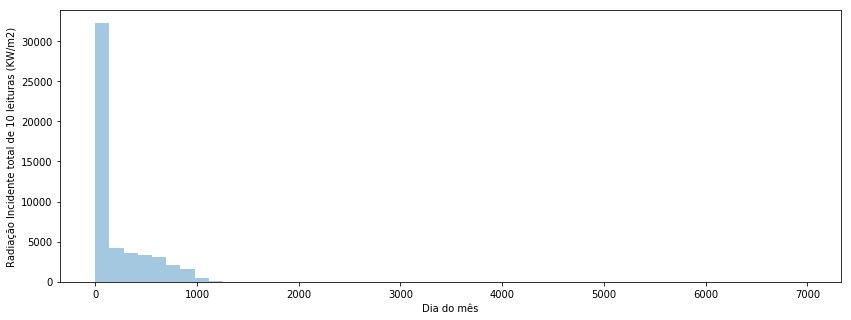

In [72]:
year = 2015

fig = plt.figure(figsize=(14, 5))
sns.distplot(base1[(base1.Ano == year)]['Radiação Incidente total de 10 leituras (KW/m2)'], kde= False)


plt.ylabel('Radiação Incidente total de 10 leituras (KW/m2)')
plt.xlabel('Dia do mês')

# Consolidando informações a mais na base

In [156]:
base1.head(2)

,Unnamed: 0,Cod,Ano,Dia Juliano,Hora - minuto,Veloc. Instantânea do Vento a 5 metros (m/s),Veloc. Instantânea do Vento a 2 metros (m/s),Direção do Vento no instante da aquisição (°),Radiação Incidente total de 10 leituras (KW/m2),Radiação Refletida Total de 10 leituras (KW/m2),Fluxo Positivo de calor no solo total de 10 leituras (W/m2),Fluxo negativo de calor no solo . total de 10 leituras (W/m2),Umidade relativa Média (%),Temperatura do Ar Média (°C),Temperatura do solo 1 Média (°C) à 3cm no solo,Temperatura do solo 2Média (°C) à 6cm no solo,Temperatura do solo 3Média (°C) Colocado sensor de UV em 31/07/09,Pressão (hPa),Chuva total do período (mm)
0,0,111.0,1997.0,1.0,10.0,1618.00,1115.000,8.32,0.0,0.0,0.0,-443.0,92.3,19.84,21.04,22.68,24.59,943.0,0.0
1,1,111.0,1997.0,1.0,20.0,0.99,0.763,20.59,0.0,0.0,0.0,-443.0,93.1,19.63,20.97,22.65,24.52,943.0,0.0


In [217]:
indices = []
var1 = 'Temperatura do Ar Média (°C)'
var2 = 'Veloc. Instantânea do Vento a 5 metros (m/s)'
var3 = 'Veloc. Instantânea do Vento a 2 metros (m/s)'



vardir = 'Direção do Vento no instante da aquisição (°)'

anos = base1.Ano.unique()
anos.sort()

dias = base1['Dia Juliano'].unique()
dias.sort()

base = base1

results = []
for a in anos:
    for d in dias: 
        base_aux = base[(base['Ano'] == a) & (base['Dia Juliano'] == d)]
        infos = []
        infos.append(a)
        infos.append(d)
        if(base_aux.shape[0]>0):    
            ix_aux = base_aux[base_aux['Temperatura do Ar Média (°C)'] == base_aux['Temperatura do Ar Média (°C)'].max()].index[0]
            infos.append(base_aux.ix[ix_aux][var1])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            indices.append(ix_aux)
            ix_aux = base_aux[base_aux['Temperatura do Ar Média (°C)'] == base_aux['Temperatura do Ar Média (°C)'].min()].index[0]
            
            infos.append(base_aux.ix[ix_aux][var1])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            indices.append(ix_aux)
            
            
            ix_aux = base_aux[base_aux['Veloc. Instantânea do Vento a 5 metros (m/s)'] == base_aux['Veloc. Instantânea do Vento a 5 metros (m/s)'].max()].index[0]
            infos.append(base_aux.ix[ix_aux][var2])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            indices.append(ix_aux)
            ix_aux = base_aux[base_aux['Veloc. Instantânea do Vento a 5 metros (m/s)'] == base_aux['Veloc. Instantânea do Vento a 5 metros (m/s)'].min()].index[0]
            
            infos.append(base_aux.ix[ix_aux][var2])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            indices.append(ix_aux)
            ix_aux = base_aux[base_aux['Veloc. Instantânea do Vento a 2 metros (m/s)'] == base_aux['Veloc. Instantânea do Vento a 2 metros (m/s)'].max()].index[0]
        
            infos.append(base_aux.ix[ix_aux][var3])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            indices.append(ix_aux)
            ix_aux = base_aux[base_aux['Veloc. Instantânea do Vento a 2 metros (m/s)'] == base_aux['Veloc. Instantânea do Vento a 2 metros (m/s)'].min()].index[0]
            indices.append(ix_aux)
            
            infos.append(base_aux.ix[ix_aux][var3])
            infos.append(base_aux.ix[ix_aux][vardir])
            
            
            results.append(infos)

df_result = pd.DataFrame(results, columns=['Ano','Dia Juliano','Temperatura Maxima','Direcao temperatura Maxima', 'Temperatura Minima','direcao temperatura Minima', 'Max Vel 5','Dir Max Vel 5','Min Vel 5', 'Dir Min Vel 5','Max Vel 2', 'Dir Max Vel 2', 'Min Vel 2','Dir Min Vel 2'])

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [218]:
df_result.head()

,Ano,Dia Juliano,Temperatura Maxima,Direcao temperatura Maxima,Temperatura Minima,direcao temperatura Minima,Max Vel 5,Dir Max Vel 5,Min Vel 5,Dir Min Vel 5,Max Vel 2,Dir Max Vel 2,Min Vel 2,Dir Min Vel 2
0,1997.0,1.0,29.39,31.28,18.53,96.60,5561.0,9.33,0.892,31.87,3075.0,134.40,0.763,20.59
1,1997.0,2.0,25.79,77.70,19.21,128.40,4266.0,154.70,0.363,63.72,2876.0,152.00,0.626,35.66
2,1997.0,3.0,25.16,125.30,17.88,144.00,4835.0,162.40,2.050,131.10,2907.0,94.80,0.717,74.70
3,1997.0,4.0,29.21,38.09,17.85,8.98,3246.0,157.30,0.461,40.96,1942.0,7.12,0.000,41.50
4,1997.0,5.0,30.46,11.78,18.06,8.92,4188.0,147.10,0.000,157.70,2646.0,9.39,0.000,157.70


In [219]:
df_result['Temperatura Minima'].min()

3.8900000000000001

In [220]:
df_result['Temperatura Maxima'].max()

44.799999999999997

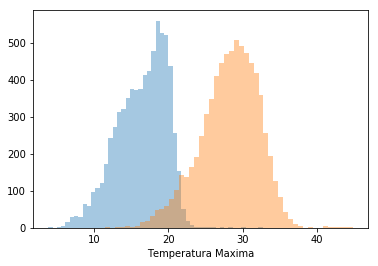

In [221]:
sns.distplot(df_result['Temperatura Minima'], kde = False)
sns.distplot(df_result['Temperatura Maxima'], kde = False)
plt.show()

In [222]:
var1 = 'Umidade relativa Média (%)'
var2 = 'Pressão (hPa)'
var3 = 'Chuva total do período (mm)'
var4 = 'Direção do Vento no instante da aquisição (°)'
var5 = 'Temperatura do Ar Média (°C)'

from statistics import mode


results = []
for a in anos:
    for d in dias:
        info = []
        base_aux = base[(base['Ano'] == a) & (base['Dia Juliano'] == d)]
        infos = []
        infos.append(a)
        infos.append(d)
        if(base_aux.shape[0]>0):
            
            #Umidade
            mean = base_aux[var1].mean()
            infos.append(mean)
            
            #Pressão
            mean = base_aux[var2].mean()
            infos.append(mean)
            
            #Chuva total
            soma= base_aux[var3].sum()
            infos.append(soma)
            
            #Direção do vento
            moda = base_aux[var4].map(dir_ar).mode()[0]
            infos.append(moda)
            
            #Temperatura do ar
            mean = base_aux[var5].mean()
            infos.append(mean)

            results.append(infos)

df_result2 = pd.DataFrame(results, columns=['Ano','Dia Juliano','Umidade media','Pressao media','Chuva total (soma)', 'Direcao do vento (moda)','Temperatura do Ar Media'])

In [223]:
df_result2.head()

,Ano,Dia Juliano,Umidade media,Pressao media,Chuva total (soma),Direcao do vento (moda),Temperatura do Ar Media
0,1997.0,1.0,79.483025,942.831933,0.0,NNE,23.115966
1,1997.0,2.0,79.262000,943.809091,0.0,SSE,21.607273
2,1997.0,3.0,81.776106,945.424779,0.0,ESE,20.239292
3,1997.0,4.0,82.735042,943.075630,0.0,NNE,22.319748
4,1997.0,5.0,84.382661,942.717742,0.0,NNE,23.182419


In [224]:
# juntando as bases

In [225]:
df_result.shape

(7207, 14)

In [226]:
df_result2.shape

(7207, 7)

In [228]:
base_merged = df_result.merge(df_result2.rename(columns = {'Dia': 'Dia Juliano'}), on = ['Ano', 'Dia Juliano'], how= 'left')

In [229]:
base_merged.shape

(7207, 19)

In [230]:
base_merged.head(2)

,Ano,Dia Juliano,Temperatura Maxima,Direcao temperatura Maxima,Temperatura Minima,direcao temperatura Minima,Max Vel 5,Dir Max Vel 5,Min Vel 5,Dir Min Vel 5,Max Vel 2,Dir Max Vel 2,Min Vel 2,Dir Min Vel 2,Umidade media,Pressao media,Chuva total (soma),Direcao do vento (moda),Temperatura do Ar Media
0,1997.0,1.0,29.39,31.28,18.53,96.6,5561.0,9.33,0.892,31.87,3075.0,134.4,0.763,20.59,79.483025,942.831933,0.0,NNE,23.115966
1,1997.0,2.0,25.79,77.70,19.21,128.4,4266.0,154.70,0.363,63.72,2876.0,152.0,0.626,35.66,79.262000,943.809091,0.0,SSE,21.607273


In [ ]:
corr = base_merged.corr()

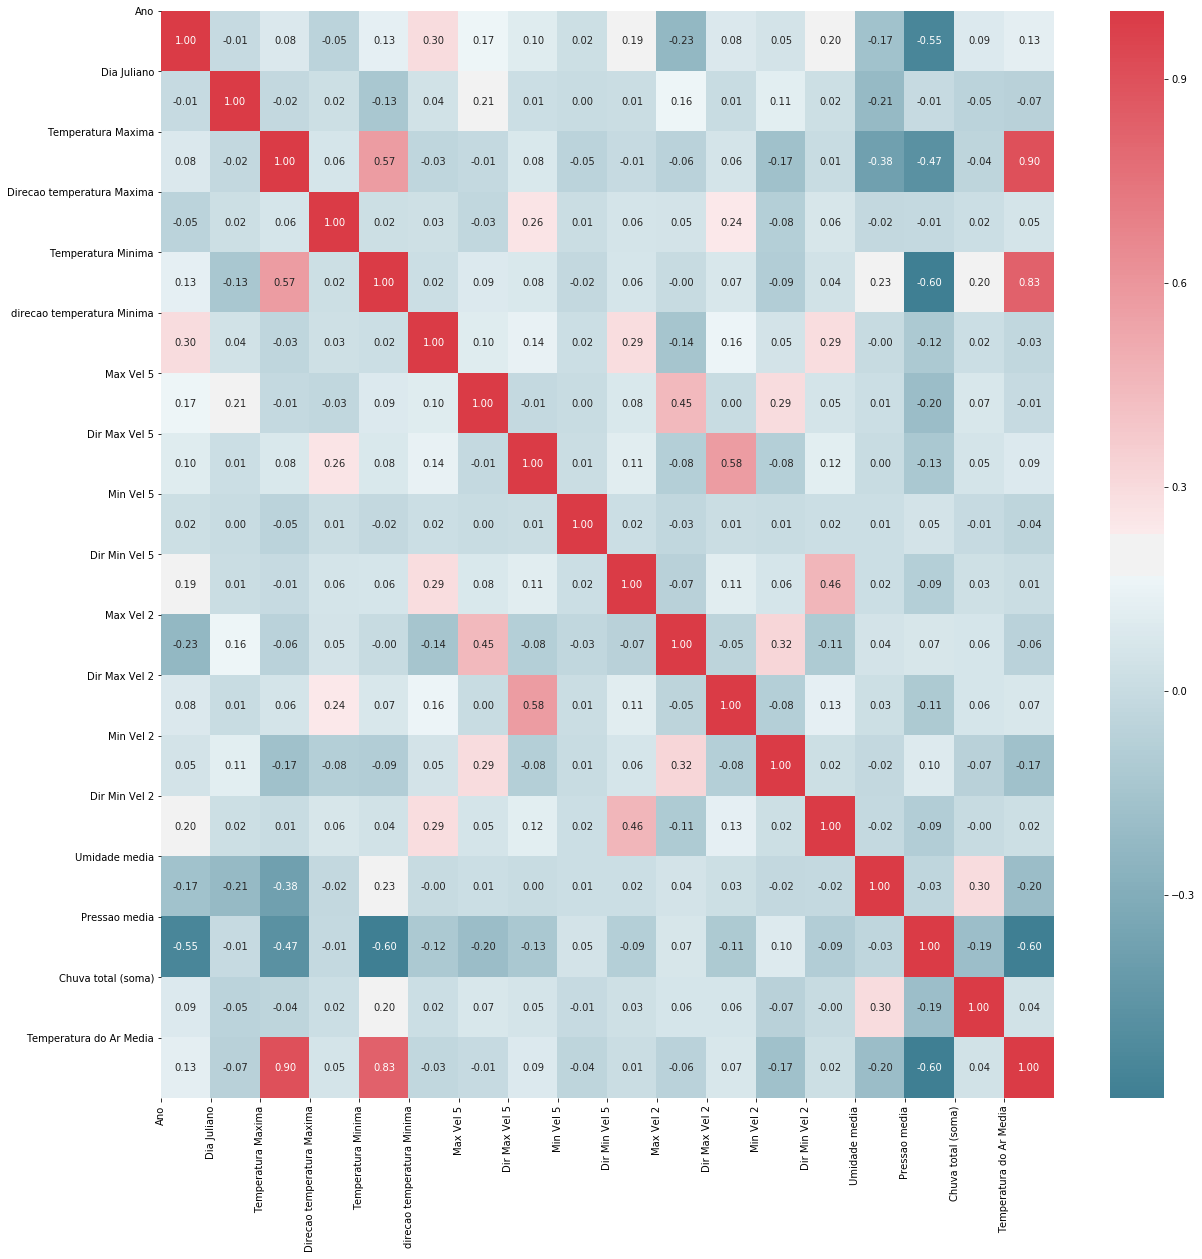

In [238]:

    #Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [239]:
base_merged.to_csv("base10_diaria.csv")

In [242]:
# Trazendo variável de Mês e Semana

# Criando variáveis de controle "Semana","Mes"

def get_month(day):
    if((day>0) & (day <= 31)):
        return 1
    elif((day>31) & (day <= 59)):
        return 2
    elif((day>59) & (day <= 90)):
        return 3
    elif((day>90) & (day <= 120)):
        return 4
    elif((day>120) & (day <= 151)):
        return 5
    elif((day>151) & (day <= 181)):
        return 6
    elif((day>181) & (day <= 212)):
        return 7
    elif((day>212) & (day <= 243)):
        return 8
    elif((day>243) & (day <= 273)):
        return 9
    elif((day>273) & (day <= 304)):
        return 10
    elif((day>304) & (day <= 334)):
        return 11
    else:
        return 12
    
def get_week(days):
    return np.floor(days/7)

In [243]:
base_merged['Mes'] = base_merged['Dia Juliano'].map(get_month)
base_merged['Semana'] = base_merged['Dia Juliano'].map(get_week)

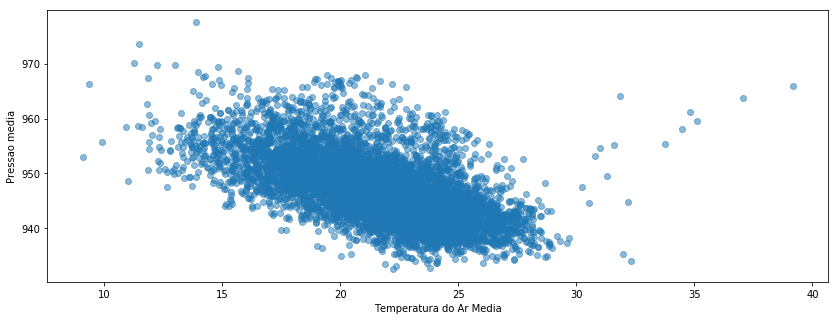

In [249]:
var1 = 'Temperatura do Ar Media'
var2 = 'Pressao media'


fig = plt.figure(figsize=(14, 5))
plt.scatter(base_merged[var1], base_merged[var2], alpha= 0.5)
plt.xlabel(var1)
plt.ylabel(var2)

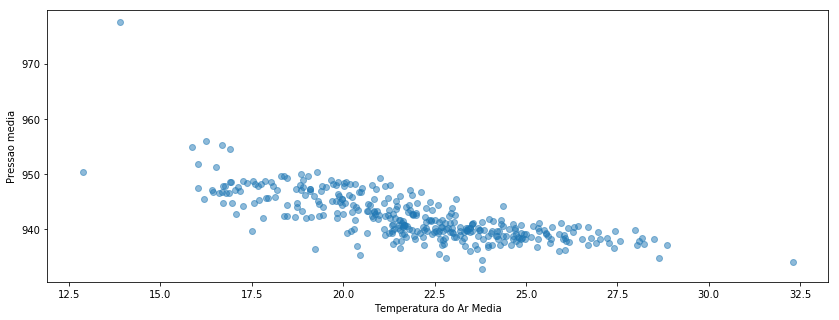

In [248]:
year = 2015

var1 = 'Temperatura do Ar Media'
var2 = 'Pressao media'


fig = plt.figure(figsize=(14, 5))
plt.scatter(base_merged[base_merged.Ano == year][var1], base_merged[base_merged.Ano == year][var2], alpha= 0.5)
plt.xlabel(var1)
plt.ylabel(var2)

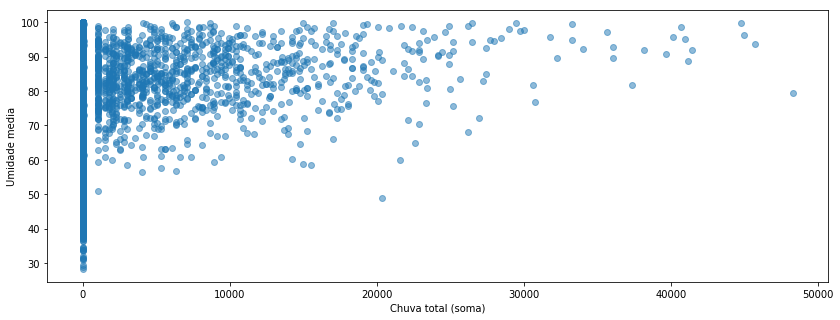

In [250]:
var1 = 'Chuva total (soma)'
var2 = 'Umidade media'


fig = plt.figure(figsize=(14, 5))
plt.scatter(base_merged[var1], base_merged[var2], alpha= 0.5)
plt.xlabel(var1)
plt.ylabel(var2)

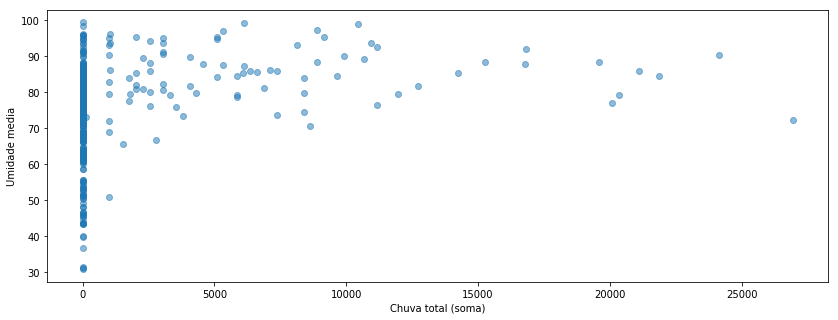

In [251]:
year = 2015

var1 = 'Chuva total (soma)'
var2 = 'Umidade media'

fig = plt.figure(figsize=(14, 5))
plt.scatter(base_merged[base_merged.Ano == year][var1], base_merged[base_merged.Ano == year][var2], alpha= 0.5)
plt.xlabel(var1)
plt.ylabel(var2)

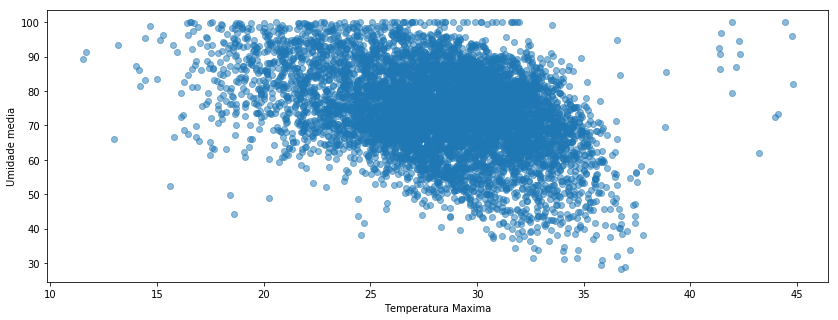

In [253]:
var1 = 'Temperatura Maxima'
var2 = 'Umidade media'


fig = plt.figure(figsize=(14, 5))
plt.scatter(base_merged[var1], base_merged[var2], alpha= 0.5)
plt.xlabel(var1)
plt.ylabel(var2)

In [254]:
base_merged.head(1)

,Ano,Dia Juliano,Temperatura Maxima,Direcao temperatura Maxima,Temperatura Minima,direcao temperatura Minima,Max Vel 5,Dir Max Vel 5,Min Vel 5,Dir Min Vel 5,...,Dir Max Vel 2,Min Vel 2,Dir Min Vel 2,Umidade media,Pressao media,Chuva total (soma),Direcao do vento (moda),Temperatura do Ar Media,Mes,Semana
0,1997.0,1.0,29.39,31.28,18.53,96.6,5561.0,9.33,0.892,31.87,...,134.4,0.763,20.59,79.483025,942.831933,0.0,NNE,23.115966,1,0.0


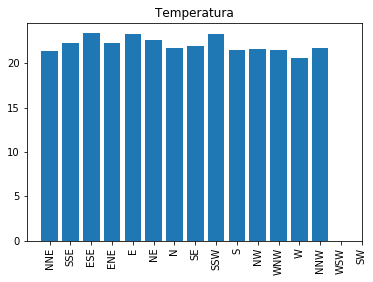

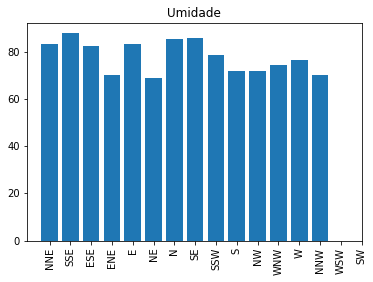

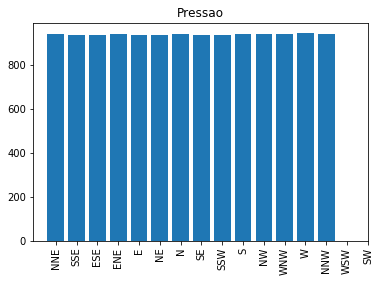

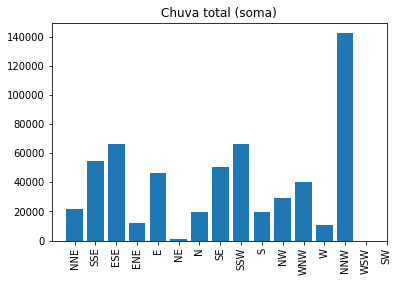

In [262]:
aux = base_merged[base_merged.Ano == 2015].groupby(['Direcao do vento (moda)']).agg({'Temperatura do Ar Media': np.mean, 'Chuva total (soma)': np.sum, 'Umidade media': np.mean, 'Pressao media': np.mean}).reset_index()

plt.title('Temperatura')
plt.bar(np.arange(len(aux['Temperatura do Ar Media'])),aux['Temperatura do Ar Media'])
plt.xticks(np.arange(len(base_merged['Direcao do vento (moda)'].unique())), base_merged['Direcao do vento (moda)'].unique(), rotation = 90)
plt.show()

plt.title('Umidade')
plt.bar(np.arange(len(aux['Umidade media'])),aux['Umidade media'])
plt.xticks(np.arange(len(base_merged['Direcao do vento (moda)'].unique())), base_merged['Direcao do vento (moda)'].unique(), rotation = 90)
plt.show()

plt.title('Pressao')
plt.bar(np.arange(len(aux['Pressao media'])),aux['Pressao media'])
plt.xticks(np.arange(len(base_merged['Direcao do vento (moda)'].unique())), base_merged['Direcao do vento (moda)'].unique(), rotation = 90)
plt.show()


plt.title('Chuva total (soma)')
plt.bar(np.arange(len(aux['Chuva total (soma)'])),aux['Chuva total (soma)'])
plt.xticks(np.arange(len(base_merged['Direcao do vento (moda)'].unique())), base_merged['Direcao do vento (moda)'].unique(), rotation = 90)
plt.show()